In [61]:
# Importing libraries
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
import seaborn as sns

import datetime

# library for encoding the categorical data 
from sklearn.compose import  ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [28]:
url = r'C:\Users\Jamal\Desktop\Datasets\laptops_cleaned.csv'
DATA = pd.read_csv(url)
DATA

,index,Company,TypeName,Inches,screen_width,screen_height,touchscreen,cpu_brand,cpu_name,cpu_speed,Ram,memory_type,primary_storage,secondary_storage,gpu_brand,OpSys,Weight,price
0,1,Apple,Ultrabook,13.3,2560,1600,0,Intel,Core i5,2.3,8,SSD,128,0,Intel,macOS,1,71379
1,2,Apple,Ultrabook,13.3,1440,900,0,Intel,Core i5,1.8,8,Flash storage,128,0,Intel,macOS,1,47896
2,3,HP,Notebook,15.6,1920,1080,0,Intel,i5 7200U,2.5,8,SSD,256,0,Intel,NaN,2,30636
3,4,Apple,Ultrabook,15.4,2880,1800,0,Intel,Core i7,2.7,16,SSD,512,0,AMD,macOS,2,135195
4,5,Apple,Ultrabook,13.3,2560,1600,0,Intel,Core i5,3.1,8,SSD,256,0,Intel,macOS,1,96096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1267,1299,Lenovo,2 in 1 Convertible,14.0,1920,1080,1,Intel,i7 6500U,2.5,4,SSD,128,0,Intel,windows,2,33993
1268,1300,Lenovo,2 in 1 Convertible,13.3,3200,1800,1,Intel,i7 6500U,2.5,16,SSD,512,0,Intel,windows,1,79867
1269,1301,Lenovo,Notebook,14.0,1366,768,0,Intel,Core N3050,1.6,2,Flash storage,64,0,Intel,windows,2,12201
1270,1302,HP,Notebook,15.6,1366,768,0,Intel,i7 6500U,2.5,6,HDD,1024,0,AMD,windows,2,40706


In [29]:
# first 10 rows of data
DATA.head(10)

,index,Company,TypeName,Inches,screen_width,screen_height,touchscreen,cpu_brand,cpu_name,cpu_speed,Ram,memory_type,primary_storage,secondary_storage,gpu_brand,OpSys,Weight,price
0,1,Apple,Ultrabook,13.3,2560,1600,0,Intel,Core i5,2.3,8,SSD,128,0,Intel,macOS,1,71379
1,2,Apple,Ultrabook,13.3,1440,900,0,Intel,Core i5,1.8,8,Flash storage,128,0,Intel,macOS,1,47896
2,3,HP,Notebook,15.6,1920,1080,0,Intel,i5 7200U,2.5,8,SSD,256,0,Intel,NaN,2,30636
3,4,Apple,Ultrabook,15.4,2880,1800,0,Intel,Core i7,2.7,16,SSD,512,0,AMD,macOS,2,135195
4,5,Apple,Ultrabook,13.3,2560,1600,0,Intel,Core i5,3.1,8,SSD,256,0,Intel,macOS,1,96096
5,6,Acer,Notebook,15.6,1366,768,0,AMD,A9-Series 9420,3.0,4,HDD,500,0,AMD,windows,2,21312
6,7,Apple,Ultrabook,15.4,2880,1800,0,Intel,Core i7,2.2,16,Flash storage,256,0,Intel,macOS,2,114018
7,8,Apple,Ultrabook,13.3,1440,900,0,Intel,Core i5,1.8,8,Flash storage,256,0,Intel,macOS,1,61736
8,9,Asus,Ultrabook,14.0,1920,1080,0,Intel,i7 8550U,1.8,16,SSD,512,0,Nvidia,windows,1,79654
9,10,Acer,Ultrabook,14.0,1920,1080,0,Intel,i5 8250U,1.6,8,SSD,256,0,Intel,windows,2,41026


In [30]:
# Lets take a copy of our dataset 
df = DATA.copy()
df

,index,Company,TypeName,Inches,screen_width,screen_height,touchscreen,cpu_brand,cpu_name,cpu_speed,Ram,memory_type,primary_storage,secondary_storage,gpu_brand,OpSys,Weight,price
0,1,Apple,Ultrabook,13.3,2560,1600,0,Intel,Core i5,2.3,8,SSD,128,0,Intel,macOS,1,71379
1,2,Apple,Ultrabook,13.3,1440,900,0,Intel,Core i5,1.8,8,Flash storage,128,0,Intel,macOS,1,47896
2,3,HP,Notebook,15.6,1920,1080,0,Intel,i5 7200U,2.5,8,SSD,256,0,Intel,NaN,2,30636
3,4,Apple,Ultrabook,15.4,2880,1800,0,Intel,Core i7,2.7,16,SSD,512,0,AMD,macOS,2,135195
4,5,Apple,Ultrabook,13.3,2560,1600,0,Intel,Core i5,3.1,8,SSD,256,0,Intel,macOS,1,96096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1267,1299,Lenovo,2 in 1 Convertible,14.0,1920,1080,1,Intel,i7 6500U,2.5,4,SSD,128,0,Intel,windows,2,33993
1268,1300,Lenovo,2 in 1 Convertible,13.3,3200,1800,1,Intel,i7 6500U,2.5,16,SSD,512,0,Intel,windows,1,79867
1269,1301,Lenovo,Notebook,14.0,1366,768,0,Intel,Core N3050,1.6,2,Flash storage,64,0,Intel,windows,2,12201
1270,1302,HP,Notebook,15.6,1366,768,0,Intel,i7 6500U,2.5,6,HDD,1024,0,AMD,windows,2,40706


In [31]:
print(f'The number of rows : {df.shape[0]}')      
print(f'The number of columns : {df.shape[1]}')

The number of rows : 1272
The number of columns : 18


#### As our data is having 1272 rows and 18 columns

In [32]:
df.describe()

,index,Inches,screen_width,screen_height,touchscreen,cpu_speed,Ram,primary_storage,secondary_storage,Weight,price
count,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000
mean,653.813679,15.130818,1894.199686,1070.531447,0.145440,2.298522,8.463050,448.059748,173.264151,2.023585,59902.143082
std,376.608478,1.954436,494.389426,284.512222,0.352683,0.507123,5.566582,366.788872,413.745616,0.872381,37297.683852
min,1.000000,10.100000,1366.000000,768.000000,0.000000,0.900000,1.000000,0.000000,0.000000,0.000000,9271.000000
25%,327.750000,14.000000,1600.000000,900.000000,0.000000,2.000000,4.000000,256.000000,0.000000,2.000000,31915.000000
50%,653.500000,15.600000,1920.000000,1080.000000,0.000000,2.500000,8.000000,256.000000,0.000000,2.000000,52108.000000
75%,981.250000,15.600000,1920.000000,1080.000000,0.000000,2.700000,8.000000,512.000000,0.000000,2.000000,79244.500000
max,1303.000000,35.600000,3840.000000,2160.000000,1.000000,3.600000,64.000000,2048.000000,2048.000000,11.000000,324955.000000


In [33]:
df.duplicated().sum()

0

#### There are no duplicate rows in the dataset

In [34]:
df.isnull().sum()

index                 0
Company               0
TypeName              0
Inches                0
screen_width          0
screen_height         0
touchscreen           0
cpu_brand             0
cpu_name              0
cpu_speed             0
Ram                   0
memory_type           1
primary_storage       0
secondary_storage     0
gpu_brand             0
OpSys                63
Weight                0
price                 0
dtype: int64

#### As we can observe that the OpSys variable has 63 null values 

In [35]:
df['OpSys'] = df['OpSys'].fillna('others')

In [36]:
df['OpSys'].value_counts()

windows    1099
others       91
linux        61
macOS        21
Name: OpSys, dtype: int64

#### Replacing the null values with others 

In [37]:
# Dropping the index column
df.drop(columns = 'index', inplace = True)

In [38]:
for col in df.columns:
    print(df[col].value_counts())
    print('--' *14)

Lenovo       290
Dell         286
HP           266
Asus         156
Acer         103
MSI           53
Toshiba       47
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
LG             3
Huawei         2
Fujitsu        2
Name: Company, dtype: int64
----------------------------
Notebook              710
Gaming                203
Ultrabook             191
2 in 1 Convertible    116
Workstation            28
Netbook                24
Name: TypeName, dtype: int64
----------------------------
15.6    640
14.0    192
17.3    162
13.3    161
12.5     38
11.6     31
12.0      6
13.9      6
13.5      5
12.3      5
15.4      4
15.0      4
35.6      3
10.1      3
24.0      2
13.0      2
18.4      1
27.3      1
33.5      1
31.6      1
17.0      1
14.1      1
11.3      1
25.6      1
Name: Inches, dtype: int64
----------------------------
1920    825
1366    301
3840     42
2560     28
3200     26
16

#### Renaming the columns

In [39]:
df.rename(columns = {'Company' : 'company','TypeName' : 'typename','Inches' : 'inches','Ram': 'ram',
                     'OpSys' : 'opsys', 'Weight' : 'weight'}, inplace = True)

In [40]:
df.columns

Index(['company', 'typename', 'inches', 'screen_width', 'screen_height',
       'touchscreen', 'cpu_brand', 'cpu_name', 'cpu_speed', 'ram',
       'memory_type', 'primary_storage', 'secondary_storage', 'gpu_brand',
       'opsys', 'weight', 'price'],
      dtype='object')

### About Variables
- company : cat_var
- typenam : cat_var
- inches  : cont_var
- screen_width : cat_var
- screen_height : cat_var
- touchscreen : cat_var
- cpu_brand : cat_var
- cpu_name : cat_var
- cpu_speed : cat_var
- ram : cat_var 
- memory_type : cat_var
- primary_storage : cat_var
- secodary_storage : cat_var
- gpu_brand : cat_var
- opsys : cat_var
- weight : cat_var
- price : cont_var (dependent variable)

#### categorizing the variables

In [41]:
cont_var = df.describe().columns

In [42]:
dep_var = df['price']

In [43]:
cat_var = [i for i in df.columns if i not in  cont_var]

### Exploratory Data Analysis 

C:\Users\Jamal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Jamal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Jamal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Jamal\anaconda3\lib\si

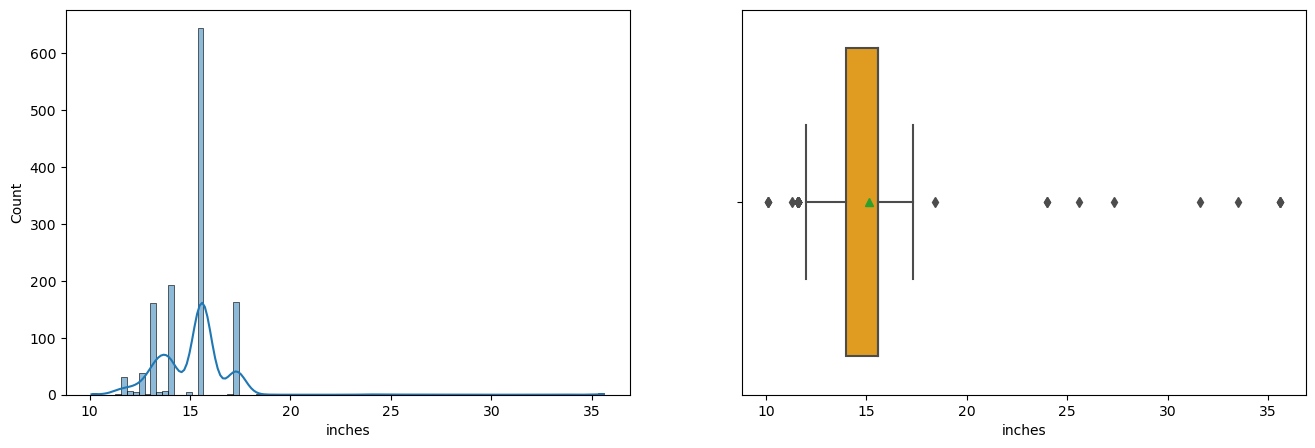

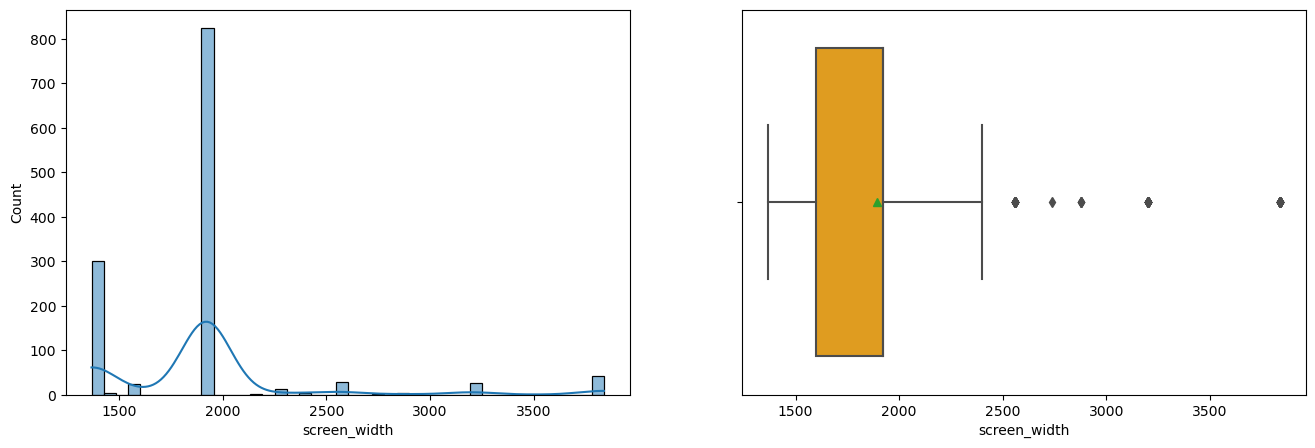

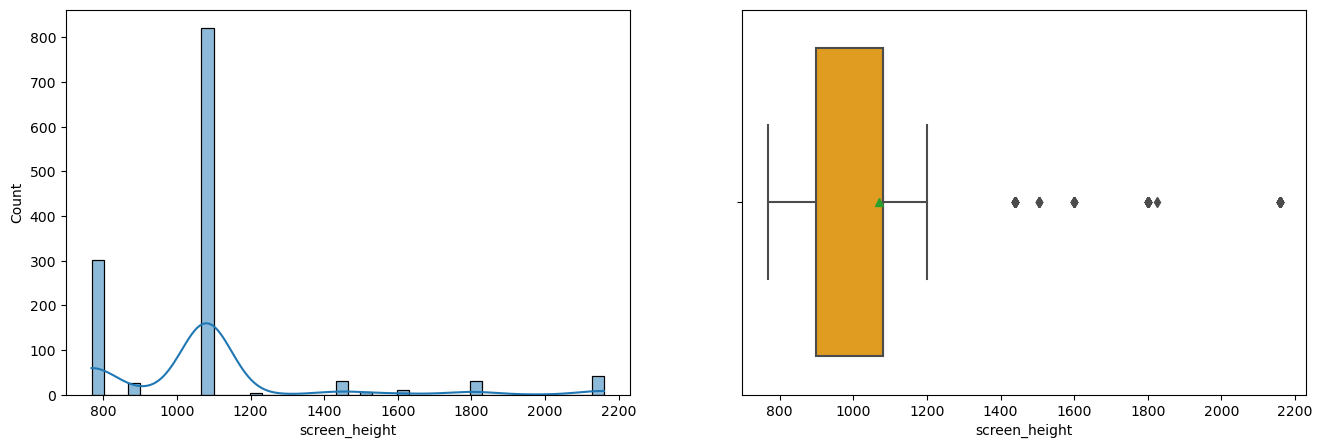

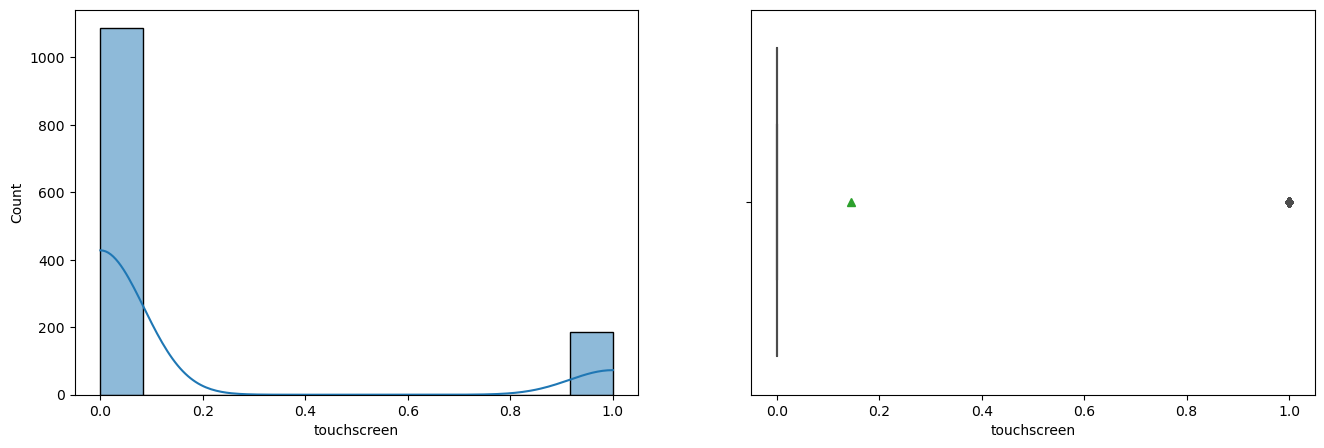

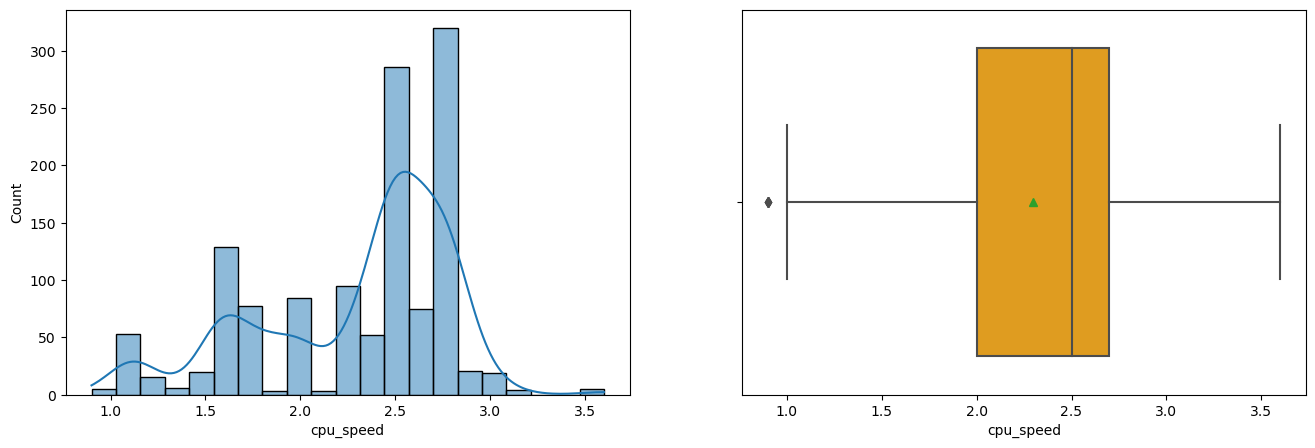

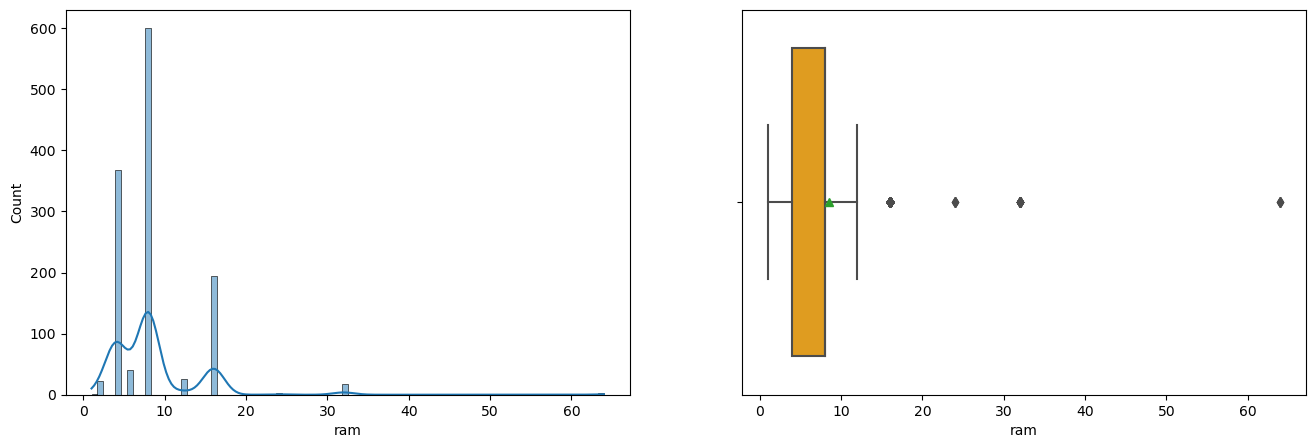

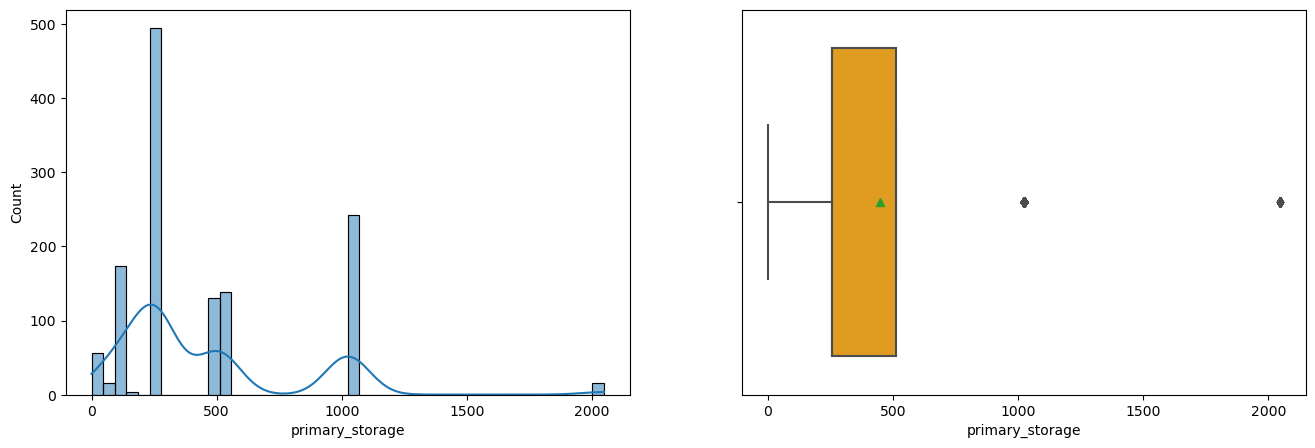

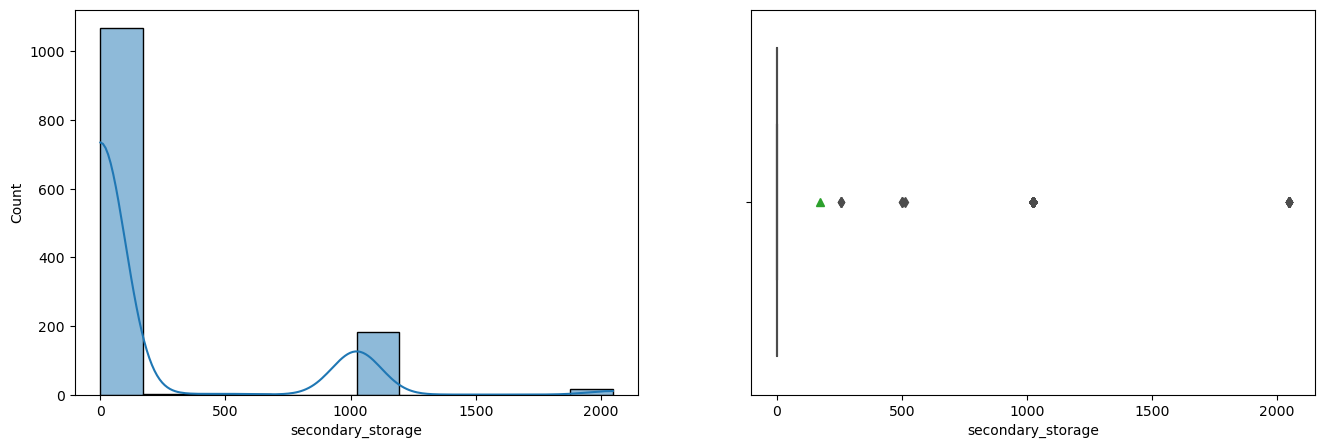

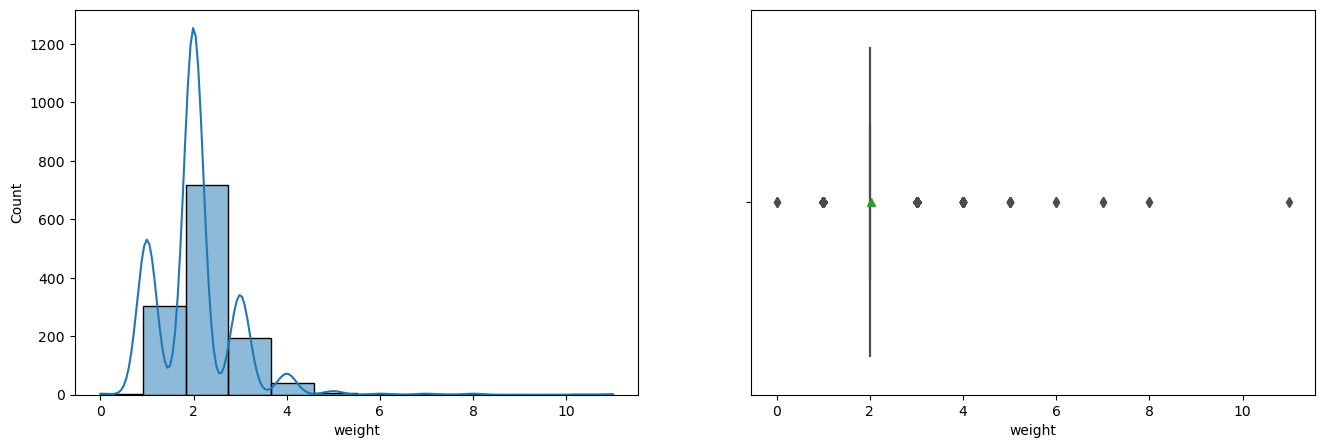

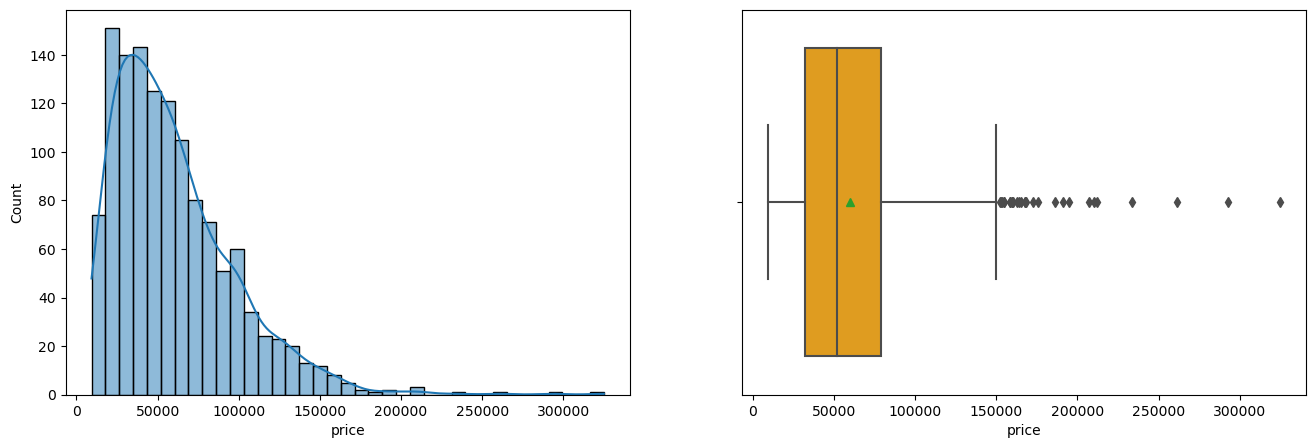

In [44]:
# visualization on numerical variables with histplot and boxplot
for col in df.describe().columns:
    fig, axes = plt.subplots(nrows = 1,ncols = 2, figsize = (16,5))
    sns.histplot(df[col], ax = axes[0],kde = True)
    sns.boxplot(df[col], ax = axes[1],showmeans = True, color= 'orange')
plt.show()

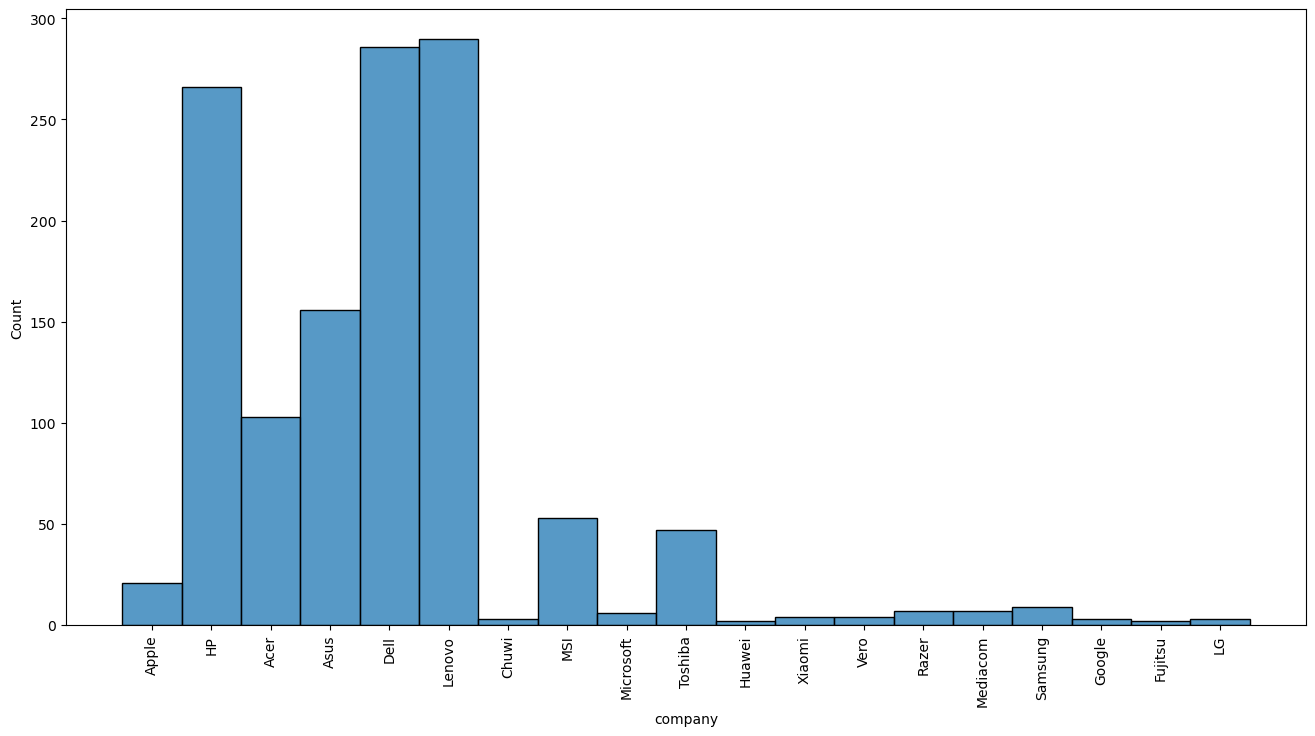

<Figure size 640x480 with 0 Axes>

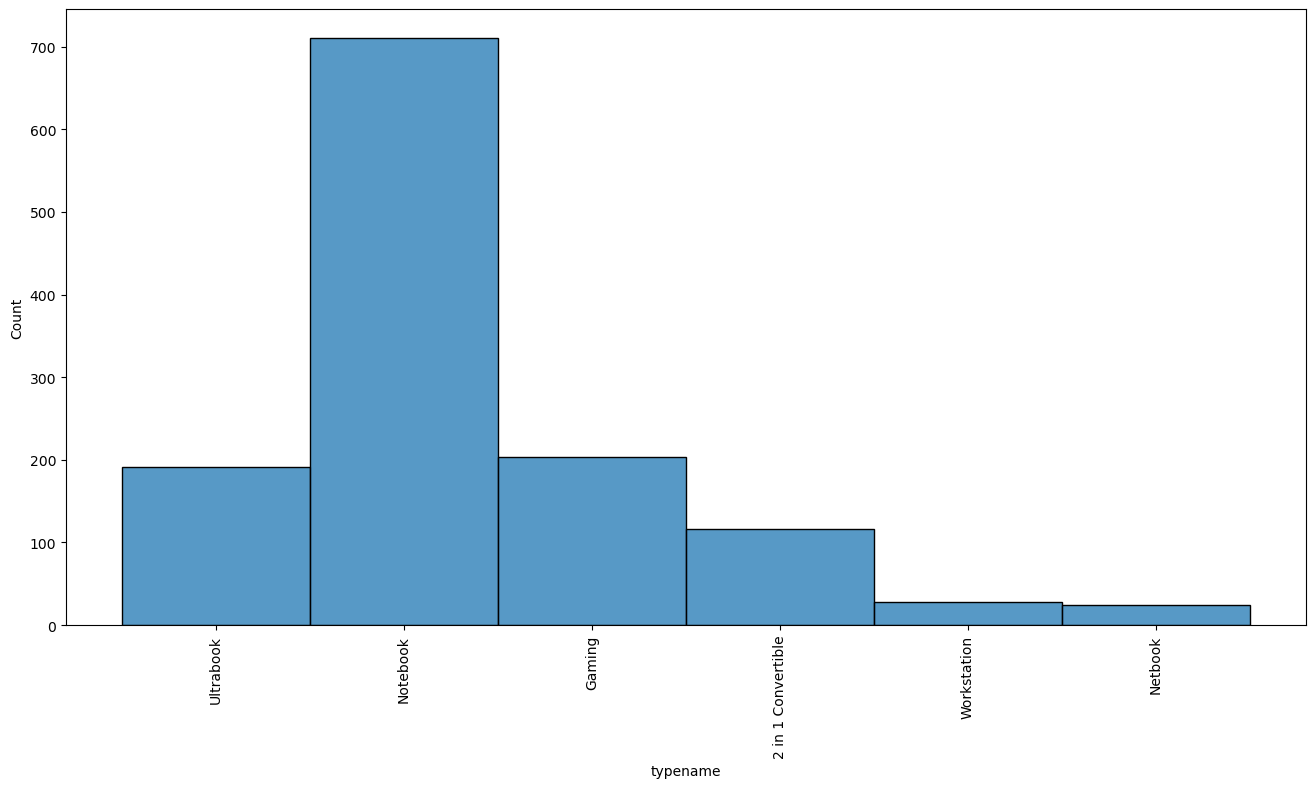

<Figure size 640x480 with 0 Axes>

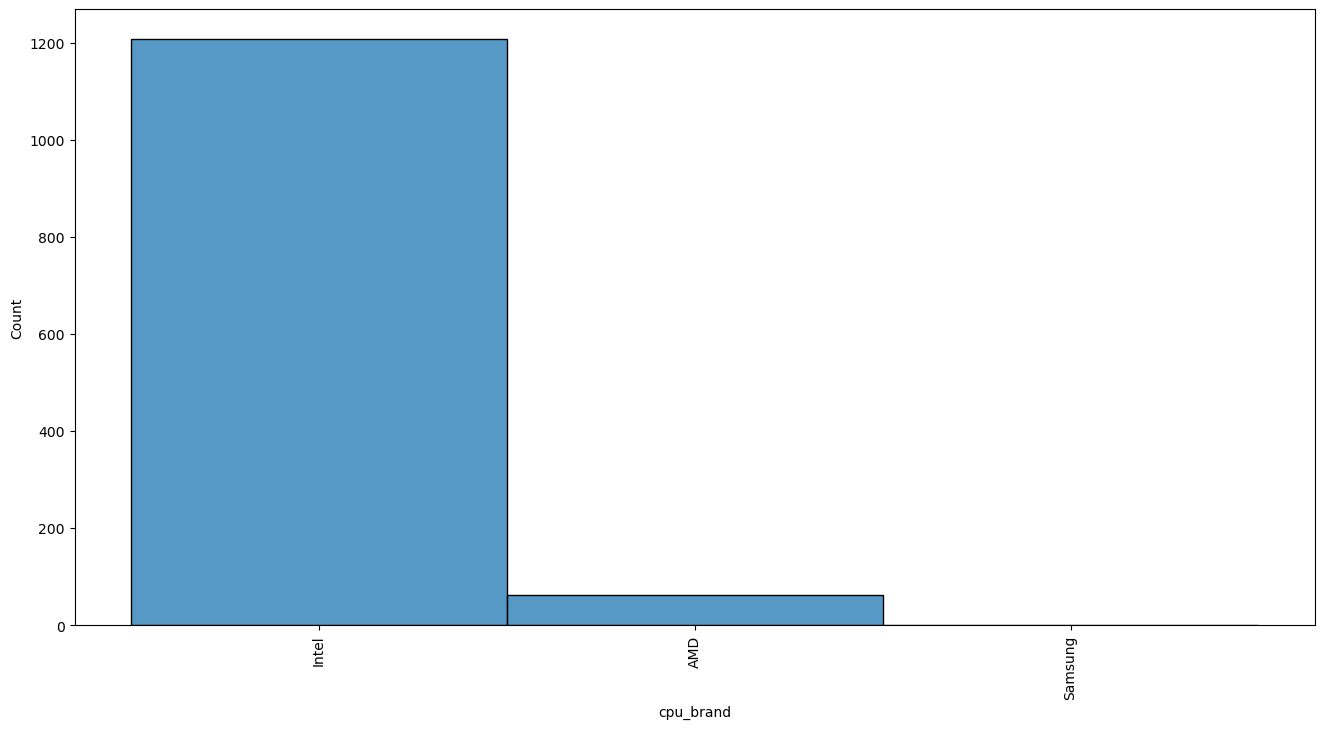

<Figure size 640x480 with 0 Axes>

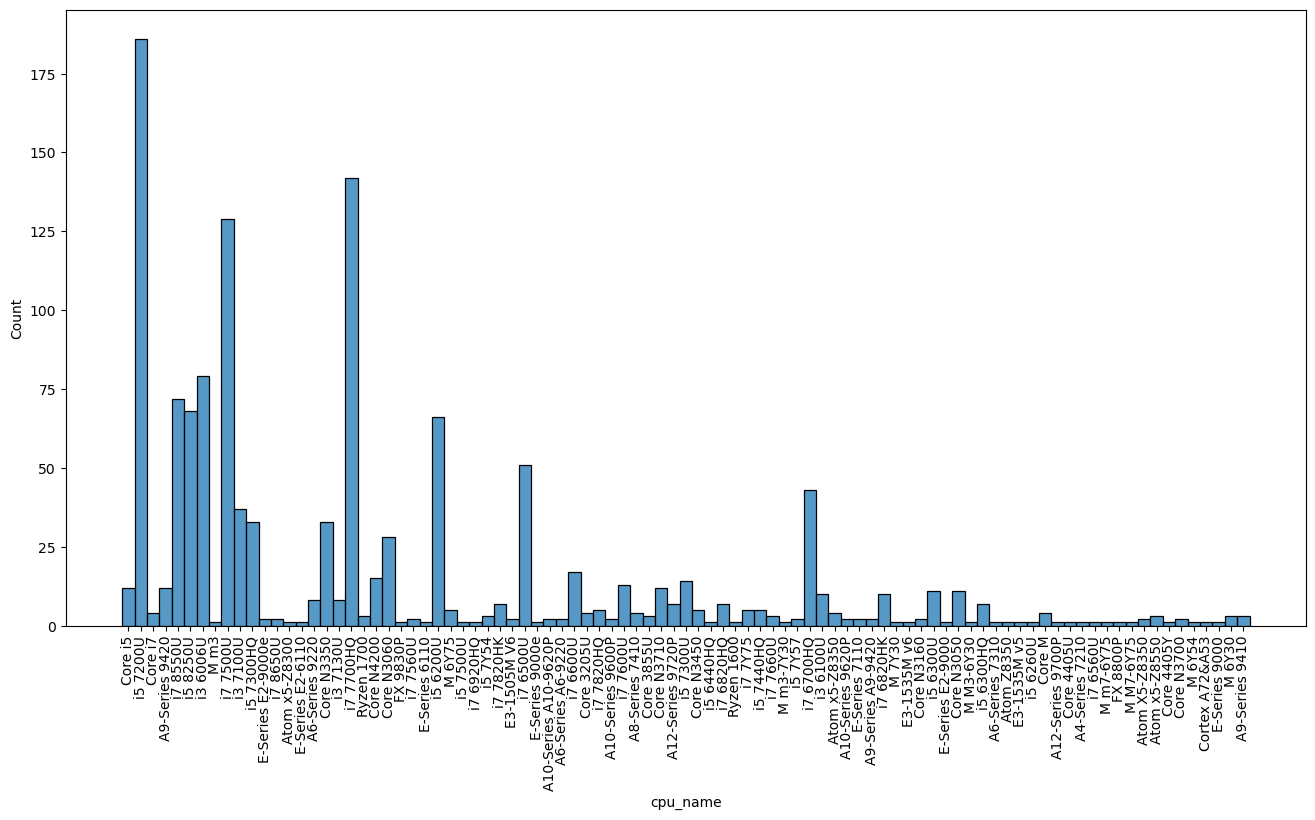

<Figure size 640x480 with 0 Axes>

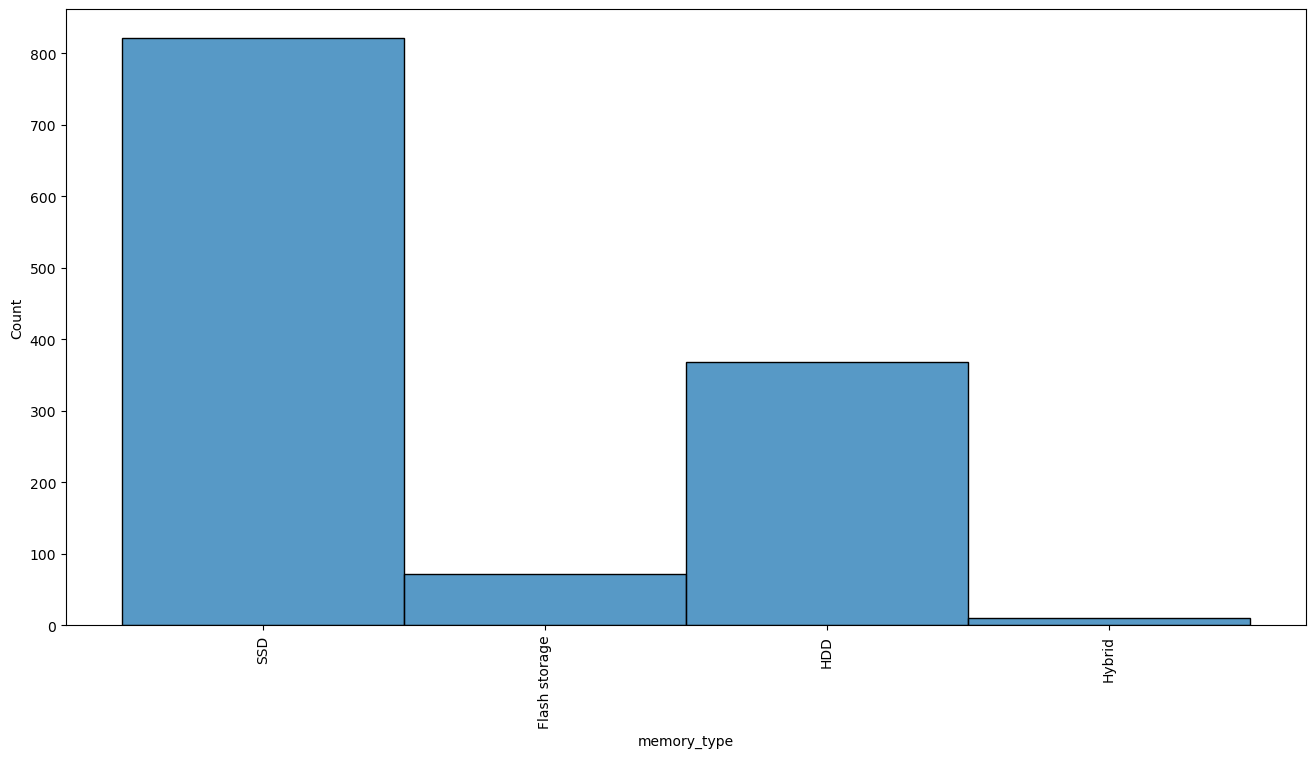

<Figure size 640x480 with 0 Axes>

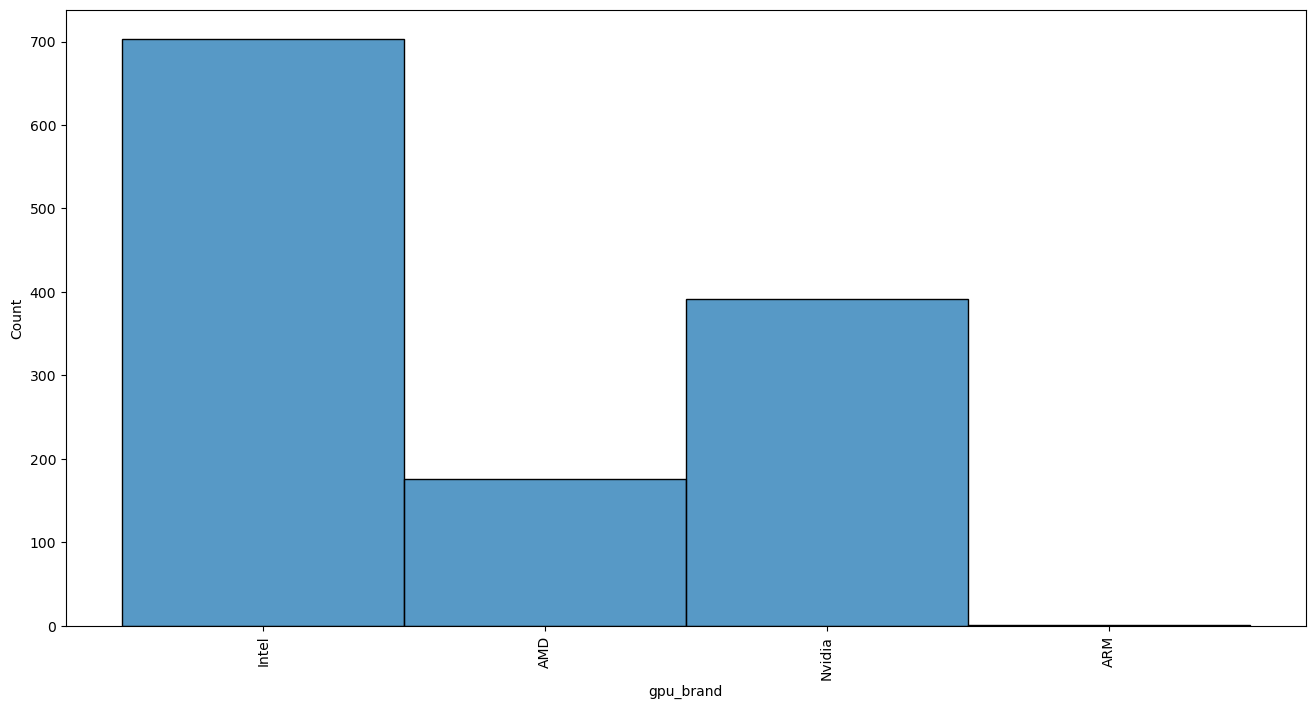

<Figure size 640x480 with 0 Axes>

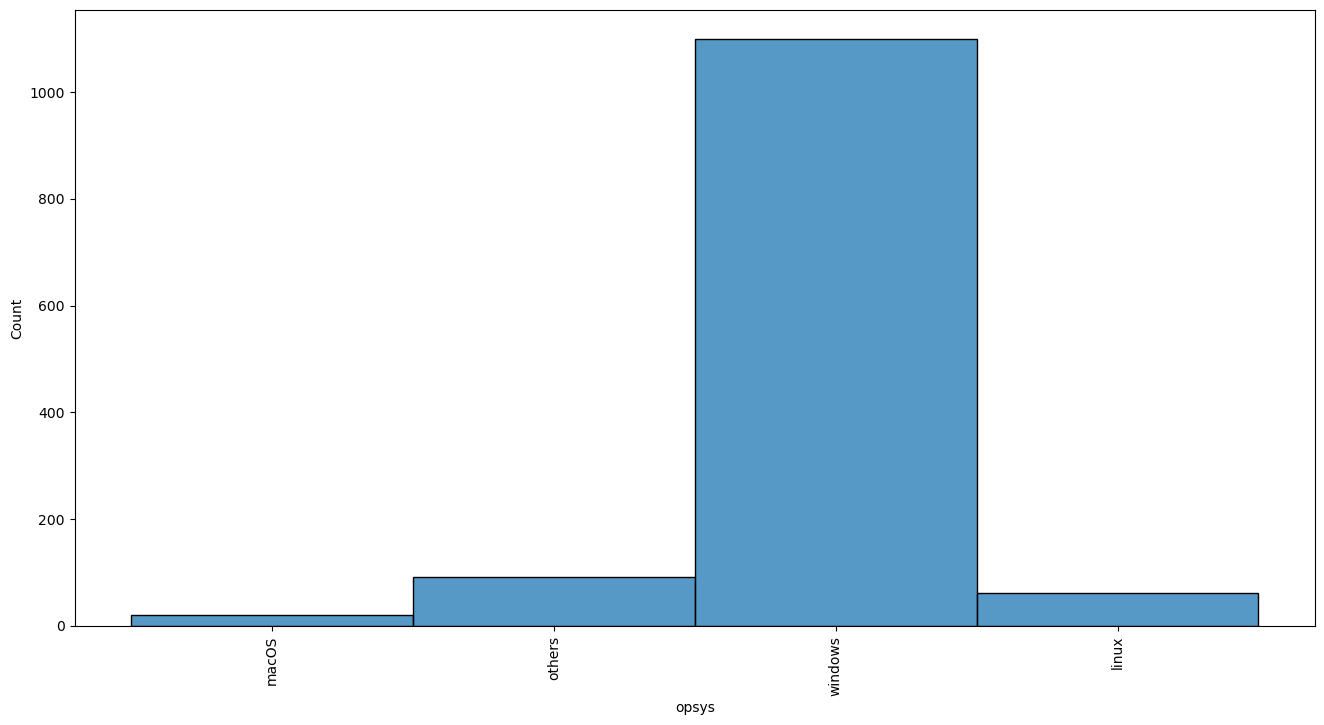

<Figure size 640x480 with 0 Axes>

In [45]:
# Visualization on categorical variables with histplot 
for col in cat_var:
    plt.figure(figsize = (16,8))
    sns.histplot(df[col])
    plt.xticks(rotation= 'vertical')
    plt.show()
    plt.tight_layout()

### visualization on dependent variable `price`

C:\Users\Jamal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


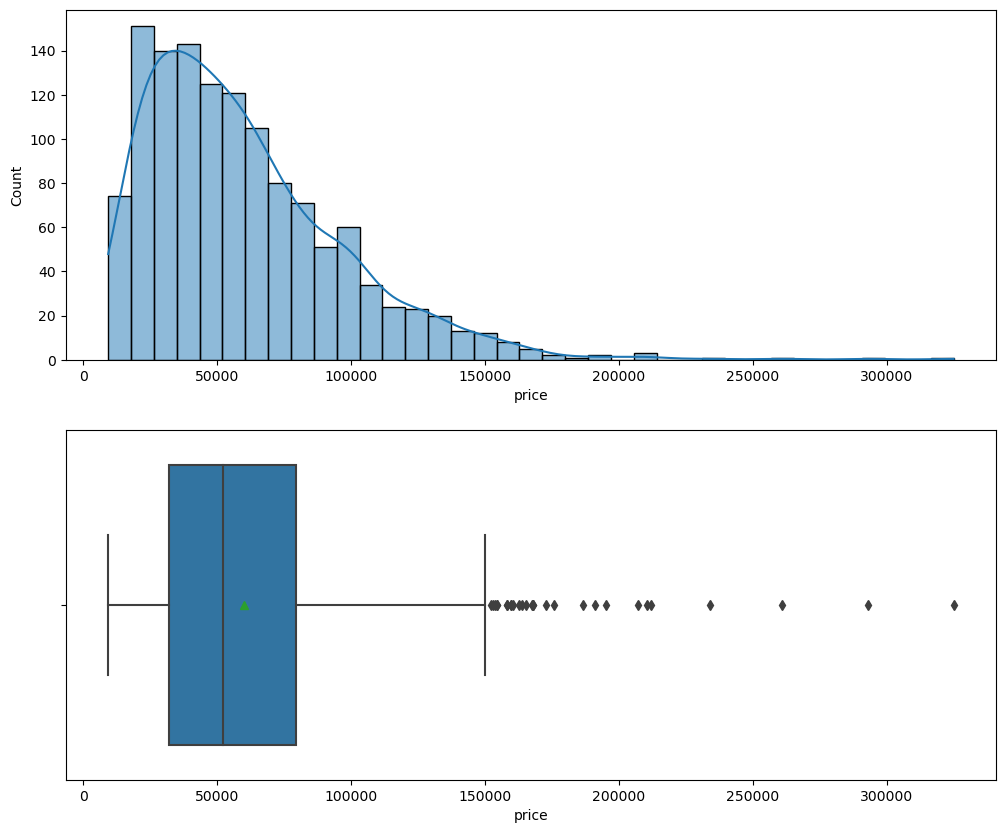

<Figure size 640x480 with 0 Axes>

In [46]:
# using kde plot to find the distribution of the variable
fig, axes = plt.subplots(nrows = 2,ncols = 1,figsize = (12,10))
sns.histplot(df['price'], kde = True, ax = axes[0])
sns.boxplot(df['price'], ax = axes[1], showmeans = True)
plt.show()
plt.tight_layout()

#### As we can observe that our dependable variable is not in normal distribution, so we will perform the transformations later on.

<AxesSubplot:>

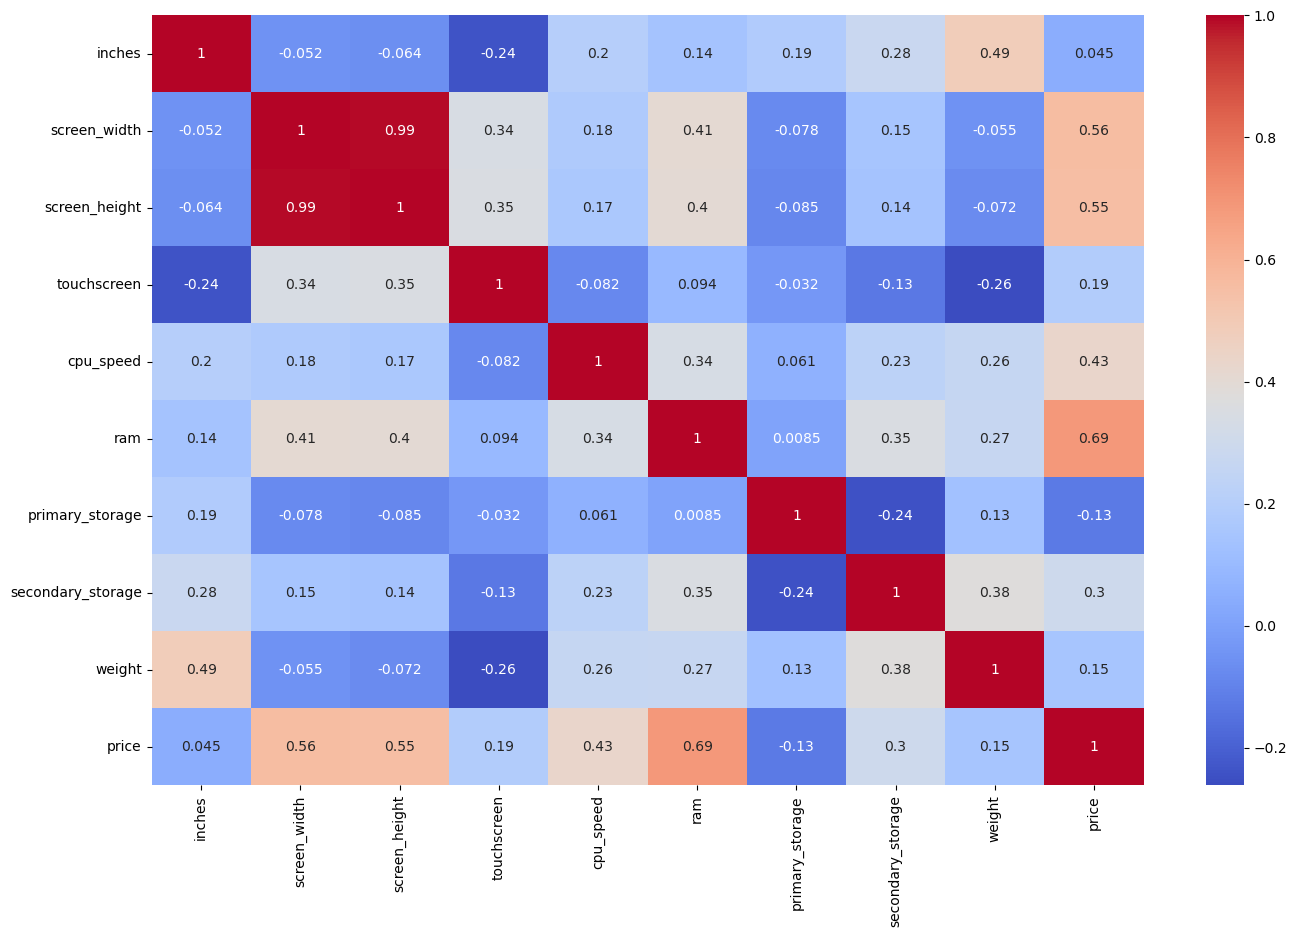

In [47]:
plt.figure(figsize= (16,10))
sns.heatmap(df.corr(), cmap = 'coolwarm', annot = True)

## Data Preprocessing

In [48]:
# Handling null/missing values
df.isnull().sum()

company              0
typename             0
inches               0
screen_width         0
screen_height        0
touchscreen          0
cpu_brand            0
cpu_name             0
cpu_speed            0
ram                  0
memory_type          1
primary_storage      0
secondary_storage    0
gpu_brand            0
opsys                0
weight               0
price                0
dtype: int64

In [49]:
# Checking for duplicates in the dataset 
df.duplicated().sum()

31

In [52]:
# Dropping the duplicate values from the dataset 
df.drop_duplicates(inplace = True)

#### The data did not have outliers and  some values are greater than the range  as those values are true values as per the data

In [53]:
df.columns

Index(['company', 'typename', 'inches', 'screen_width', 'screen_height',
       'touchscreen', 'cpu_brand', 'cpu_name', 'cpu_speed', 'ram',
       'memory_type', 'primary_storage', 'secondary_storage', 'gpu_brand',
       'opsys', 'weight', 'price'],
      dtype='object')

In [54]:
# Encoding the variables using pandas and saving it in another  variable as `temp_df` 
temp_df = pd.DataFrame(pd.get_dummies(df[['company', 'typename', 'inches', 'screen_width', 'screen_height',
       'touchscreen', 'cpu_brand', 'cpu_name', 'cpu_speed', 'ram',
       'memory_type', 'primary_storage', 'secondary_storage', 'gpu_brand',
       'opsys', 'weight', 'price']]))
temp_df
print(f'The number of rows in df : {temp_df.shape[0]}')
print(f'The number of columns in df : {temp_df.shape[1]}')

The number of rows in df : 1241
The number of columns in df : 141


In [58]:
temp_df.columns.tolist()

['inches',
 'screen_width',
 'screen_height',
 'touchscreen',
 'cpu_speed',
 'ram',
 'primary_storage',
 'secondary_storage',
 'weight',
 'price',
 'company_Acer',
 'company_Apple',
 'company_Asus',
 'company_Chuwi',
 'company_Dell',
 'company_Fujitsu',
 'company_Google',
 'company_HP',
 'company_Huawei',
 'company_LG',
 'company_Lenovo',
 'company_MSI',
 'company_Mediacom',
 'company_Microsoft',
 'company_Razer',
 'company_Samsung',
 'company_Toshiba',
 'company_Vero',
 'company_Xiaomi',
 'typename_2 in 1 Convertible',
 'typename_Gaming',
 'typename_Netbook',
 'typename_Notebook',
 'typename_Ultrabook',
 'typename_Workstation',
 'cpu_brand_AMD',
 'cpu_brand_Intel',
 'cpu_brand_Samsung',
 'cpu_name_A10-Series 9600P',
 'cpu_name_A10-Series 9620P',
 'cpu_name_A10-Series A10-9620P',
 'cpu_name_A12-Series 9700P',
 'cpu_name_A12-Series 9720P',
 'cpu_name_A4-Series 7210',
 'cpu_name_A6-Series 7310',
 'cpu_name_A6-Series 9220',
 'cpu_name_A6-Series A6-9220',
 'cpu_name_A8-Series 7410',
 'cpu_

## Handling Multicolinearity 

In [142]:
# libraries for multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [143]:
def cal_vif(X):
    vif = pd.DataFrame()
    vif['variables'] = X.columns
    vif['vif'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    return vif

In [156]:
# extracting the continours variables from the dataframe to find the multicolinearity
temp_df.head(1)

,inches,screen_width,screen_height,touchscreen,cpu_speed,ram,primary_storage,secondary_storage,weight,price,...,memory_type_Hybrid,memory_type_SSD,gpu_brand_AMD,gpu_brand_ARM,gpu_brand_Intel,gpu_brand_Nvidia,opsys_linux,opsys_macOS,opsys_others,opsys_windows
0,13.3,2560,1600,0,2.3,8,128,0,1,71379,...,0,1,0,0,1,0,0,1,0,0


In [158]:
temp = cal_vif(temp_df)
temp

C:\Users\Jamal\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,vif
0,inches,2.440149
1,screen_width,1869.487412
2,screen_height,1943.643892
3,touchscreen,3.887934
4,cpu_speed,44.285710
...,...,...
136,gpu_brand_Nvidia,inf
137,opsys_linux,inf
138,opsys_macOS,inf
139,opsys_others,inf


In [163]:
# variables which have < 5 vif value
temp[temp['vif'] < 5]

,variables,vif
0,inches,2.440149
3,touchscreen,3.887934
5,ram,2.656185
6,primary_storage,4.082497
7,secondary_storage,2.355919
8,weight,2.131839


### Transformation of dependent variable

C:\Users\Jamal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


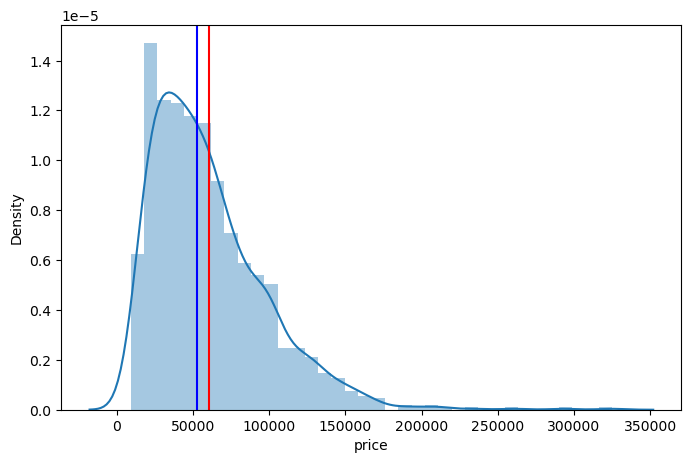

In [173]:
plt.figure(figsize = (8,5))
sns.distplot(temp_df['price'])
plt.axvline(temp_df['price'].mean(), color = 'red')
plt.axvline(temp_df['price'].median(), color = 'blue')
plt.show()

C:\Users\Jamal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


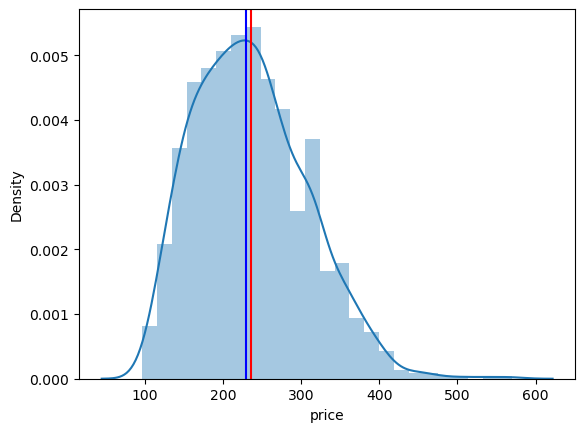

In [181]:
# applying square root transformation to the dependent variable
sns.distplot(np.sqrt(temp_df['price']))
plt.axvline(np.sqrt(temp_df['price']).mean(), color = 'red')
plt.axvline(np.sqrt(temp_df['price']).median(), color = 'blue')
plt.show()

In [184]:
np.sqrt(temp_df['price']).skew()

0.5701564911123186

### As per the above, we can observe that the square root transformation is transforming the data to normal distribution

## Data scaling

In [187]:
X = temp_df.drop('price', axis = 1)
y = np.sqrt(temp_df['price'])
features = [i for i in temp_df.columns if i not in ['price']

In [189]:
# Scaling the data 
from sklearn.preprocessing import StandardScaler

In [190]:
sc = StandardScaler()
X = sc.fit_transform(temp_df[features])

array([[-0.93521008,  1.33818261,  1.85268858, ...,  7.62202323,
        -0.28130132, -2.51857008],
       [-0.93521008, -0.93258401, -0.61245115, ...,  7.62202323,
        -0.28130132, -2.51857008],
       [ 0.233823  ,  0.04060168,  0.02144192, ..., -0.13119876,
         3.55490684, -2.51857008],
       ...,
       [-0.93521008,  2.63576353,  2.55701421, ..., -0.13119876,
        -0.28130132,  0.39705069],
       [-0.57941741, -1.0826168 , -1.07730607, ..., -0.13119876,
        -0.28130132,  0.39705069],
       [ 0.233823  , -1.0826168 , -1.07730607, ..., -0.13119876,
        -0.28130132,  0.39705069]])

## Data splitting

In [191]:
from sklearn.model_selection import train_test_split

In [194]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state =42)
print(X_train.shape)
print(X_test.shape)

(992, 140)
(249, 140)


### Model Implementation